# Extrusion

## Screw dosification stage modelling

##### Javier Hipólito Marsal

This notebook states volumetric flow rate as a function of pressure drop. So screw & nozzle operating points can be analyzed and choose the most appropiate. 

<img src="static/screw2.png" alt="screw" style="width: 300px;"/>


### Assumptions 

Screw channel is rectangular 

Screw channel is unrolled (like a flat plate)

Cylinder is a plane surface moving over screw channel

Molten fluid is newtonian

Fluid is uncompressible

Process is continuos and has reached stationary conditions
### Navier - Bernoulli equation

This is the original equation, describes the motion of viscous fluid substances. Uses newton second law & merges with assumption that stress in the fluid is because of pressure & viscous diffusion.

\begin{array}{ll}
\frac{\delta^2 v}{\delta x^2} + \frac{\delta^2 v}{\delta^2 y^2} = \frac{1}{\eta}(\frac{dP}{dZ})
\end{array}


Screw volumetric flow rate equation is the final step of this equation


### Screw volumetric flow rate 


\begin{array}{ll}
Q^{screw} = \frac{\pi^2 D^2 (sin \theta cos \theta) h N}{2} - \frac{h^3 \pi D sin^2 \theta \Delta P}{12 \eta L}  
\end{array}

### Nozzle volumetric flow rate

This equation is Hagen-Poiseuille which was obtained experimentally.

\begin{array}{ll}
Q^{nozzle} = \frac{\pi R^4}{8 L} \frac{\Delta P}{\eta}
\end{array}

__Velocity across the screw__

It is very interesting to see that both terms are produced because of pressure and fluid dragging. This plot shows how velocity behaves as a sum of both components.

<img src="static/flow.png" alt="flow" style="width: 300px;"/>

__Code & conclusions__

Play with variables (wide range available) to see how the system behaves and which nozzle should be taken for each screw.

Screw length affects slope of Q = f(pressure drop) if it increases slope decreases.
Channel depth affects intercept of flow rate so if it increases intercept decreases.

Nozzle equation for Q=f(pressure drop) starts at the origin and when bigger the nozzle is the bigger its slope.

Operating points are the ones where screw operating line and nozzle operating line intersect.

Therefore, if nozzle  is small choose hight screw length vs channel depth. If it is greater just the opposite.

In [1]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from IPython.html.widgets import interact


C:\Users\Javier\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


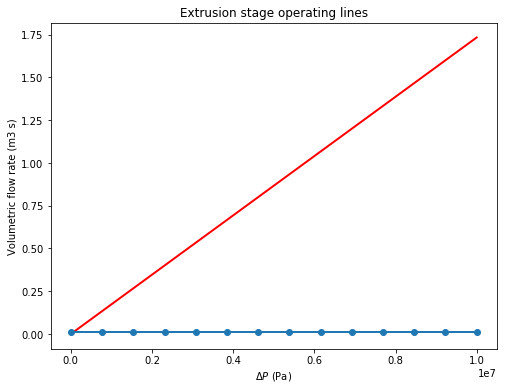

In [2]:
visc = 10**3

def plot_flow_rate(D=0.04,L = 4, angle= np.pi/4, N = 30, h = 0.001 ,  grid_points=12, plot_nozzle=True):
    
    """
    plot nozzle variable can be set to false in order to not to show its plot.
    """
    R = D/2
    AP = np.linspace(0, 10000000, grid_points + 2)
    Q = np.pi**2 * D**2 *(np.sin(angle)*np.cos(angle))*h*N/2 - h**3 * np.pi * D * np.sin(angle)**2 * AP/12/visc/L

    
    Qn = np.pi * R**4 / 8 / L * AP/visc

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('$\Delta P $ (Pa) ')
    ax.set_ylabel('Volumetric flow rate (m3 s)')
    ax.set_title('Extrusion stage operating lines')

    if plot_nozzle:
        ax.plot(AP, Qn, color='red', linestyle='solid', linewidth=2)

    ax.plot(AP,  Q,  marker='o', linewidth=2)

# Interact function creates a user interface to see how variables affect the system.

interact(plot_flow_rate, D=(0.01, 0.9, 0.1), L=(0.4,20,1), angle=(0,np.pi,0.5), N=(20,100,5), h = (0.0005,0.003,0.0005), grid_points=(10, 16, 1), plot_nozzle=True);